# Eliminación de Nodos en un BST

La eliminación de un nodo en un árbol binario de búsqueda (BST) es una operación más compleja que la inserción o la búsqueda. Requiere considerar tres casos distintos para mantener las propiedades del BST intactas. A continuación, se detallan los pasos y consideraciones para cada uno de estos casos.

- **Concepto de Eliminación en BST:**
  - **Nodo Hoja**: Si el nodo a eliminar no tiene hijos, simplemente se elimina del árbol, actualizando la referencia del padre para que apunte a None.
  - **Nodo con un solo hijo**: Si el nodo a eliminar tiene un solo hijo, se reemplaza en el árbol por su hijo.
  - **Nodo con dos hijos**: Si el nodo a eliminar tiene dos hijos, se busca el sucesor inorden (el nodo más pequeño en el subárbol derecho) o el predecesor inorden (el nodo más grande en el subárbol izquierdo), y se copia su valor en el nodo a eliminar. Luego, se elimina el sucesor o predecesor inorden.

- **Aplicaciones de la Eliminación en BST:**
  - Mantenimiento de estructuras de datos dinámicas.
  - Operaciones de actualización en bases de datos.
  - Algoritmos de juego donde se deben quitar y añadir elementos dinámicamente.

## Implementación en Python

Aquí te muestro cómo implementar este método en la clase [`BST`](src/BST.py): 

In [6]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BST.py
from src.BST import BST

In [7]:
def delete(self, key):
    # Eliminar un nodo con la llave dada.
    self.root = self._delete_recursive(self.root, key)

def _delete_recursive(self, node, key):
    if not node:
        # No se encontró el nodo, regresar None.
        return None

    # Buscar el nodo a eliminar.
    if key != node.data:
        if key < node.data:
            # El nodo a eliminar está en el subárbol izquierdo.
            node.left = self._delete_recursive(node.left, key)
        else:  # key > node.data
            # El nodo a eliminar está en el subárbol derecho.
            node.right = self._delete_recursive(node.right, key)
        return node

    # Si se encontró el nodo, procedemos a eliminarlo.
    return self._delete_node_found(node)

def _delete_node_found(self, node):
    # Caso con cero o un hijo.
    if not node.left or not node.right:
        # Retornar el nodo hijo si existe, sino None.
        return node.left or node.right

    # Nodo con dos hijos: encontrar y asignar el sucesor inorden.
    successor_value = self._get_min_value(node.right)
    node.data = successor_value
    # Eliminar el sucesor inorden después de reasignarlo.
    node.right = self._delete_recursive(node.right, successor_value)
    return node

def _get_min_value(self, node):
    # Obtener el valor mínimo del subárbol comenzando por el nodo dado.
    while node.left:
        node = node.left
    return node.data

# Extender la clase BST con el nuevo método
BST.delete = delete
BST._delete_recursive = _delete_recursive
BST._delete_node_found = _delete_node_found
BST._get_min_value = _get_min_value

## Pruebas de Eliminación

Para probar la función de eliminación, se puede utilizar el siguiente código:

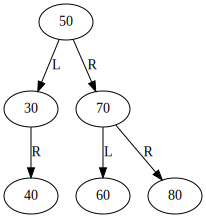

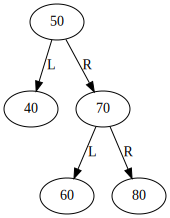

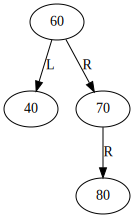

In [8]:
# Creación y modificación del árbol
tree = BST()
elements = [50, 30, 70, 20, 40, 60, 80]
for el in elements:
    tree.insert(el)

# Eliminación de varios elementos y visualización después de cada eliminación
for el in [20, 30, 50]:
    tree.delete(el)
    # Visualizar el árbol
    dot = visualize_bt(tree)
    display(dot)

## Complejidad del Algoritmo

- **Complejidad Temporal**: En el peor caso es O(n), especialmente en árboles desbalanceados que se asemejan a una lista enlazada. Para árboles más balanceados, la complejidad es O(log n).
  
- **Complejidad Espacial**: La complejidad del espacio es también O(h) debido al uso del stack de llamadas en la implementación recursiva, donde h es la altura del árbol.

## Ejercicios Prácticos

1. **Eliminación Secuencial**: Dado un conjunto de valores `[10, 40, 30, 60, 90]`, inserta estos en un BST y luego elimina cada uno secuencialmente, mostrando el árbol después de cada eliminación.

2. **Restauración del Árbol**: Después de realizar una serie de eliminaciones en un BST, realiza inserciones para restaurar el árbol a su estado original. Verifica si el árbol resultante mantiene la estructura y propiedad de BST.

## Soluciones a los Ejercicios

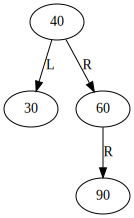

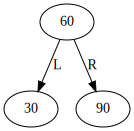

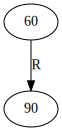

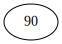

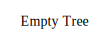

In [9]:
### Solución al Ejercicio 1

values = [10, 40, 30, 60, 90]
tree = BST()
for value in values:
    tree.insert(value)

for value in values:
    tree.delete(value)
    # Visualizar el árbol
    dot = visualize_bt(tree)
    display(dot)

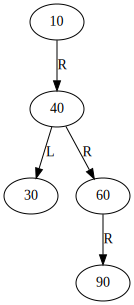

In [10]:
### Solución al Ejercicio 2

# Insertando elementos para restaurar el árbol
restoration_values = [10, 40, 30, 60, 90]
for value in restoration_values:
    tree.insert(value)

# Visualizar el árbol
dot = visualize_bt(tree)
dot